This is a complement to the *Mathematica* notebook of the same name.

In [1]:
BaseDirectory = "BASE//PATH//TO//ReferComm"
import os
os.chdir(BaseDirectory)

import numpy as np
from statistics import stdev
import matplotlib.pyplot as plt

os.chdir("./Behavioural-Analysis")
import DataHandler
import importlib
importlib.reload(DataHandler)

from DataHandler import *
os.chdir("../")

In [2]:
# loading agent for dynamical analysis
a = Data(BaseDirectory,maxP=2,popidx=1)
a.LoadAllPlotData(d2=False)

# Behaviour

Overview

In [3]:
# function for plotting Transient and Communication phase

elev = 15
azim = -30
def PlotTransCommPair(fig,perm=[1,3],start=[1,5]):
    for i in range(len(start)):
        ax = fig.add_subplot(2,4,start[i],projection="3d")
        ax.set_xlim([0,250])
        ax.set_xticks(np.arange(0,251,50))
        ax.tick_params(labelsize=18,pad=10)
        ax = ClearGrid(ax)
        ax = a.PlotScaffold(ax,n=50)
        ax = a.PlotSenderPosition3D(ax,perm=perm[i],phase=1)
        ax = a.PlotPosts3D(ax,perm=perm[i],phase=1)
        ax = a.PlotContact3D(ax,perm=perm[i],phase=1)
        ax.set_box_aspect(aspect=[1,.25,.25])
        ax.view_init(elev=elev,azim=azim)
    
        ax = fig.add_subplot(2,4,start[i]+1,projection="3d")
        ax.set_xlim([0,300])
        ax.set_xticks(np.arange(0,301,50))
        ax.tick_params(labelsize=16,pad=10)
        ax = ClearGrid(ax)
        ax = a.PlotScaffold(ax,n=30)
        ax = a.PlotSenderPosition3D(ax,perm=perm[i],phase=2)
        ax = a.PlotReceiverPosition3D(ax,perm=perm[i],phase=2)
        ax = a.PlotContact3D(ax,perm=perm[i],phase=2)
        ax.set_box_aspect(aspect=[1,.25,.25])
        ax.view_init(elev=elev,azim=azim)

    return ax

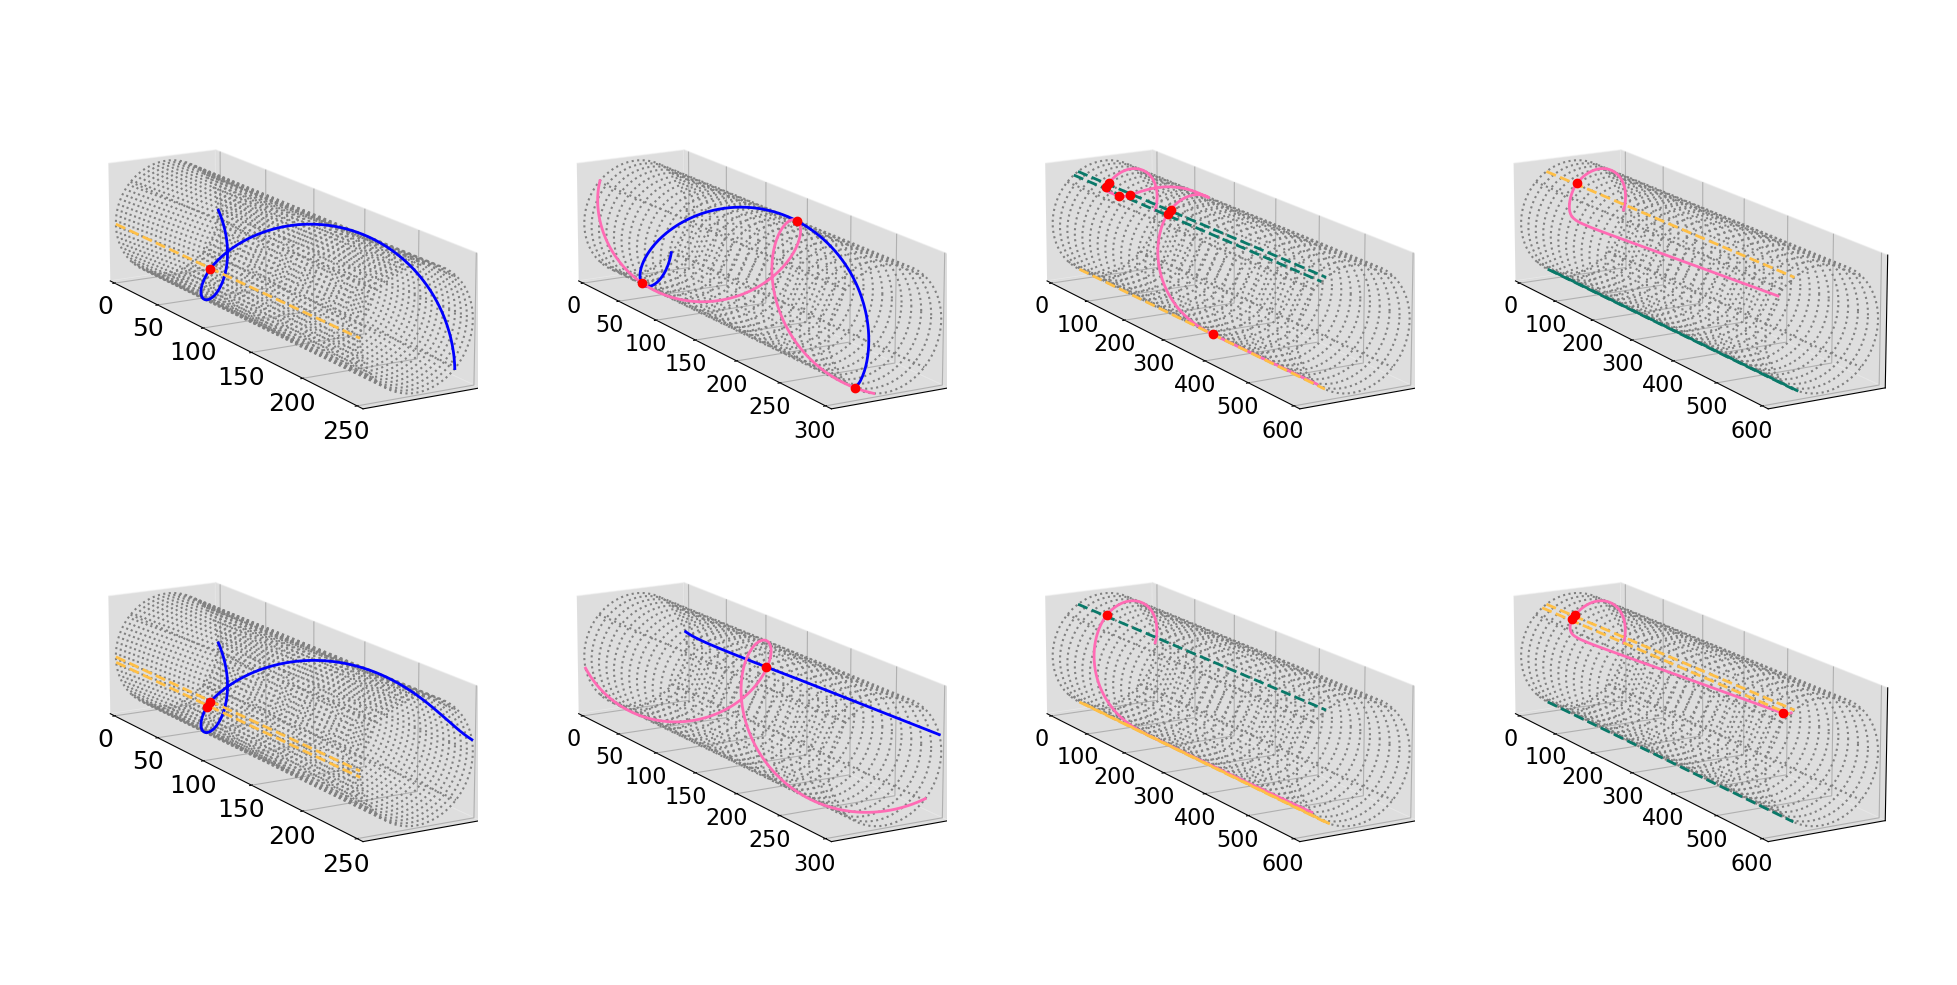

In [4]:
# display all 3D position plots

fig = plt.figure(figsize=(25,25))

ax = PlotTransCommPair(fig)

for i in range(1,5):
    ax = fig.add_subplot(2,4,2+i+2*(i>2),projection="3d")
    ax.set_xlim([0,600])
    ax.set_xticks(np.arange(0,601,100))
    ax.tick_params(labelsize=16,pad=10)
    ax = ClearGrid(ax)
    ax = a.PlotScaffold(ax,n=30)
    ax = a.PlotReceiverPosition3D(ax,perm=i,phase=3)
    ax = a.PlotPosts3D(ax,perm=i,phase=3)
    ax = a.PlotContact3D(ax,perm=i,phase=3)
    ax.set_box_aspect(aspect=[1,.25,.25])
    ax.view_init(elev=elev,azim=azim)

fig.subplots_adjust(wspace=-.12,hspace=-.71)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/DA-behaviour.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/DA-behaviour.jpeg',bbox_inches="tight",dpi=600)
plt.show()

# Dimensional Reduction

Visual Summary of Neuronal Variation


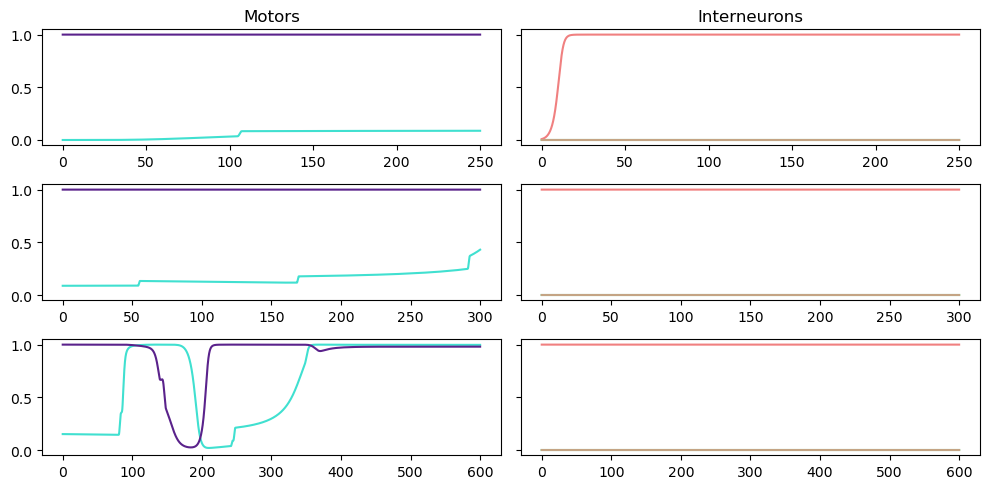

In [5]:
# visual summary of neuron variation

fig,axs = plt.subplots(3,2,figsize=(10,5),sharey="all",sharex="row")
p = 1

for i in range(2):
    axs[i,0] = a.PlotSenderActivation(axs[i,0],perm=p,phase=i+1,n=[1,2])
    axs[i,1] = a.PlotSenderActivation(axs[i,1],perm=p,phase=i+1,n=[3,4,5])
axs[2,0] = a.PlotReceiverActivation(axs[2,0],perm=p,phase=3,n=[1,2])
axs[2,1] = a.PlotReceiverActivation(axs[2,1],perm=p,phase=3,n=[3,4,5])

axs[0,0].set_title("Motors")
axs[0,1].set_title("Interneurons")

fig.tight_layout()
plt.show()

Calculating Variance/Standard Deviation per Neuron

In [6]:
# concatenating all neuron activity

sender_m1 = np.empty(0)
sender_m2 = np.empty(0)
sender_i1 = np.empty(0)
sender_i2 = np.empty(0)
sender_i3 = np.empty(0)

receiver_m1 = np.empty(0)
receiver_m2 = np.empty(0)
receiver_i1 = np.empty(0)
receiver_i2 = np.empty(0)
receiver_i3 = np.empty(0)

for i in range(4):
    for j in range(2):
        for k in range(5):
            sender_m1 = np.concatenate((sender_m1,a.Sender[i][j].iloc[:,2]))
            sender_m2 = np.concatenate((sender_m2,a.Sender[i][j].iloc[:,3]))
            sender_i1 = np.concatenate((sender_i1,a.Sender[i][j].iloc[:,4]))
            sender_i2 = np.concatenate((sender_i2,a.Sender[i][j].iloc[:,5]))
            sender_i3 = np.concatenate((sender_i3,a.Sender[i][j].iloc[:,6]))
            receiver_m1 = np.concatenate((receiver_m1,a.Receiver[i][j].iloc[:,2]))
            receiver_m2 = np.concatenate((receiver_m2,a.Receiver[i][j].iloc[:,3]))
            receiver_i1 = np.concatenate((receiver_i1,a.Receiver[i][j].iloc[:,4]))
            receiver_i2 = np.concatenate((receiver_i2,a.Receiver[i][j].iloc[:,5]))
            receiver_i3 = np.concatenate((receiver_i3,a.Receiver[i][j].iloc[:,6]))

In [7]:
# calculating variance per neuron (takes ~30s to evaluate)

sender_var = [sender_m1,sender_m2,sender_i1,sender_i2,sender_i3]
receiver_var = [receiver_m1,receiver_m2,receiver_i1,receiver_i2,receiver_i3]

for i in range(5):
    sender_var[i] = stdev(sender_var[i])
    receiver_var[i] = stdev(receiver_var[i])

In [8]:
print("Sender: ")
print("Motor1: ",sender_var[0])
print("Motor2: ",sender_var[1])
print("Inter1: ",sender_var[2])
print("Inter2: ",sender_var[3])
print("Inter3: ",sender_var[4])

print("\nReceiver: ")
print("Motor1: ",receiver_var[0])
print("Motor2: ",receiver_var[1])
print("Inter1: ",receiver_var[2])
print("Inter2: ",receiver_var[3])
print("Inter3: ",receiver_var[4])

Sender: 
Motor1:  0.3978737283156931
Motor2:  0.008384271200230754
Inter1:  6.421997874071822e-08
Inter2:  0.11738207113861217
Inter3:  7.88567007903457e-06

Receiver: 
Motor1:  0.44783045476763594
Motor2:  0.11143728685125955
Inter1:  5.3900187328375956e-08
Inter2:  0.0921444559087458
Inter3:  6.740300162857526e-06


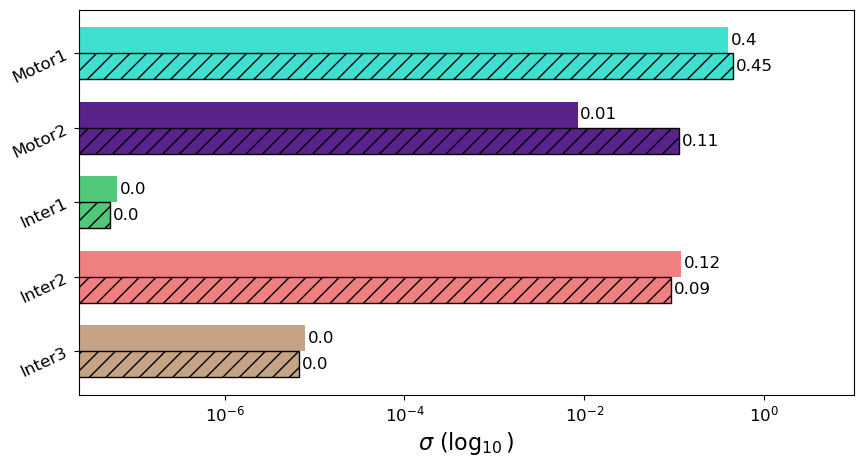

In [9]:
fig,ax = plt.subplots(1,1,figsize=(10,5),sharex="all",sharey="all")

n_names = ["Motor1","Motor2","Inter1","Inter2","Inter3"]
c = [[.251,.878,.816],[.351,.133,.545],[.312,.784,.471],[.941,.502,.502],[.769,.643,.518]]

b1 = ax.barh(np.arange(5),sender_var,log=True,
    color=c,align="edge",height=-.35)
b2 = ax.barh(np.arange(5),receiver_var,log=True,
    color=c,align="edge",height=.35,hatch="//",edgecolor="0")

ax.bar_label(b1,labels=np.array(sender_var).round(2),padding=2,fontsize=12)
ax.bar_label(b2,labels=np.array(receiver_var).round(2),padding=2,fontsize=12)
ax.set_yticks(np.arange(5),labels=n_names,rotation=25,fontsize=12)
ax.tick_params(axis='x',labelsize=12)
ax.set_xbound(upper=10)
ax.set_xlabel("$\sigma$ ($\log_{10}$)",fontsize=16)

ax.invert_yaxis()

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/DS-variance.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/DS-variance.jpeg',bbox_inches="tight",dpi=600)
plt.show()

Lesioning Tests

In [10]:
# loading data
os.chdir(BaseDirectory)
os.chdir("./EvoP2/Pop-1/robust")

S_lesion = []
R_lesion = []
low_fit = []
avg_fit = []

for i in range(4):
    file = "L-RPF-" + str(i) + ".dat"
    S_lesion.append(np.loadtxt(file,dtype=int,delimiter=" ",max_rows=1))
    R_lesion.append(np.loadtxt(file,dtype=int,delimiter=" ",skiprows=1,max_rows=1))
    fit = np.loadtxt(file,dtype=float,delimiter=" ",skiprows=34,max_rows=1)
    low_fit.append(fit[0])
    avg_fit.append(fit[1])

for i in range(4):
    print(S_lesion[i],R_lesion[i],": ",low_fit[i],avg_fit[i],"\n")

os.chdir(BaseDirectory)

[3 4 5] [3 4 5] :  0.0 0.0 

3 3 :  0.879776 0.971362 

[3 5] [3 5] :  0.879703 0.971346 

4 4 :  0.0 0.0 



In [11]:
# Inter2 lesion test after transient

os.chdir(BaseDirectory)
os.chdir("./EvoP2/Pop-1/robust")

fit = np.loadtxt("L-RPF-4.dat",dtype=float,delimiter=" ",skiprows=32,max_rows=1)
print("low: ",fit[0])
print("avg: ",fit[1])

low:  0.0
avg:  0.0


In [12]:
# Inter2 fixed output test

os.chdir(BaseDirectory)
os.chdir("./EvoP2/Pop-1/robust")

fit = np.loadtxt("L-RPF-5.dat",dtype=float,delimiter=" ",skiprows=32,max_rows=1)
print("low: ",fit[0])
print("avg: ",fit[1])

low:  0.889435
avg:  0.971414


# Nonautonomous Trajectories

Sender-Post Interaction

In [13]:
# converting trajectories to motor1-sensor space

p1sens = a.Sender[0][0]["Sensor"]
p1m1 = a.Sender[0][0]["Motor1"]
p1m2 = a.Sender[0][0]["Motor2"]

p2sens = a.Sender[2][0]["Sensor"]
p2m1 = a.Sender[2][0]["Motor1"]
p2m2 = a.Sender[2][0]["Motor2"]

print(p1sens[p1sens>0])
print(p2sens[p2sens>0])

10414    0.007065
10415    0.007491
10416    0.007943
10417    0.008422
10418    0.008929
           ...   
10756    0.008482
10757    0.008024
10758    0.007590
10759    0.007180
10760    0.006791
Name: Sensor, Length: 347, dtype: float64
10075    0.006847
10076    0.007261
10077    0.007700
10078    0.008165
10079    0.008658
           ...   
10793    0.008445
10794    0.008041
10795    0.007655
10796    0.007288
10797    0.006939
Name: Sensor, Length: 723, dtype: float64


In [14]:
# P=1

p1sens = p1sens.iloc[10400:11000]
p1m1 = p1m1.iloc[10400:11000]
p1m2 = p1m2.iloc[10400:11000]

os.chdir(BaseDirectory)
os.chdir("Dynamical-Analysis")
file1 = open("naTraj1.txt","w")
file1.write("")
file1.close()
file1 = open("naTraj1.txt","a")
for i in range(0,(11000-10400)):
    string = str(p1sens.iloc[i])+" "+str(p1m1.iloc[i])+" "+str(p1m2.iloc[i])+"\n"
    file1.write(string)
file1.close()

In [15]:
# P=2

p2sens = p2sens.iloc[10000:25000]
p2m1 = p2m1.iloc[10000:25000]
p2m2 = p2m2.iloc[10000:25000]

os.chdir(BaseDirectory)
os.chdir("Dynamical-Analysis")
file2 = open("naTraj2.txt","w")
file2.write("")
file2.close()
file2 = open("naTraj2.txt","a")
for i in range(0,(25000-10000)):
    string = str(p2sens.iloc[i])+" "+str(p2m1.iloc[i])+" "+str(p2m2.iloc[i])+"\n"
    file2.write(string)
file2.close()

# Finding Step-Points

In [16]:
p1_trans = a.Sender[0][0] # interaction with 1-post
p1_comm = a.Receiver[0][0] # 3-step interaction
p2_search = a.Receiver[2][1] # interaction with 1-post

In [17]:
lowsens = p1_trans["Sensor"][p1_trans["Sensor"]<0.0075]
print(lowsens[lowsens>0])
lowsens = p1_comm["Sensor"][p1_comm["Sensor"]<0.0075]
print(lowsens[lowsens>0])
lowsens = p2_search["Sensor"][p2_search["Sensor"]<0.0075]
print(lowsens[lowsens>0])


10414    0.007065
10415    0.007491
10759    0.007180
10760    0.006791
Name: Sensor, dtype: float64
5395     0.007007
5568     0.007089
16803    0.006832
16987    0.006913
29083    0.007389
29290    0.007100
Name: Sensor, dtype: float64
7481    0.007022
7482    0.007421
7862    0.007477
7863    0.007129
7864    0.006796
Name: Sensor, dtype: float64


In [18]:
os.chdir(BaseDirectory)
os.chdir("Dynamical-Analysis")

# clear files
file = open("p1_trans.txt","w")
file.write("")
file.close()
file = open("p1_comm.txt","w")
file.write("")
file.close()
file = open("p2_search.txt","w")
file.write("")
file.close()

# time
p1_trans_t = [10410]
p1_comm_t = [5390,16800,29082,30000]
p2_search_t = [7470]

# write to file
file = open("p1_trans.txt","a")
for i in p1_trans_t:
    file.write(str(p1_trans.iloc[i]["Motor1"])+"\n")
file.close()
file = open("p1_comm.txt","a")
for i in p1_comm_t:
    file.write(str(p1_comm.iloc[i]["Motor1"])+"\n")
file.close()
file = open("p2_search.txt","a")
for i in p2_search_t:
    file.write(str(p2_search.iloc[i]["Motor1"])+"\n")
file.close()